In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.datasets import cifar10
from tensorflow.keras.applications import VGG19

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
base_model = VGG19(include_top=False, weights = "imagenet",
                   input_shape = (32,32,3))

for layer in base_model.layers:
  layer.trainable = False

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(250,activation=("relu")))
model.add(Dropout(0.2))
model.add(Dense(100,activation=("relu")))
model.add(Dropout(0.35))
model.add(Dense(10,activation=("softmax")))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_7 (Flatten)         (None, 512)               0         
                                                                 
 dense_30 (Dense)            (None, 250)               128250    
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_31 (Dense)            (None, 100)               25100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_32 (Dense)            (None, 10)               

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

model.fit(x_train, y_train, 
          batch_size=500, epochs=10, 
          validation_data=(x_test, y_test), 
          callbacks=[learning_rate_reduction])

Epoch 1/10
100/100 [==============================] - 13s 110ms/step - loss: 1.7906 - accuracy: 0.3642 - val_loss: 1.4374 - val_accuracy: 0.4931 - lr: 0.0010
Epoch 2/10
100/100 [==============================] - 9s 94ms/step - loss: 1.4532 - accuracy: 0.4867 - val_loss: 1.3184 - val_accuracy: 0.5372 - lr: 0.0010
Epoch 3/10
100/100 [==============================] - 9s 95ms/step - loss: 1.3555 - accuracy: 0.5258 - val_loss: 1.2587 - val_accuracy: 0.5599 - lr: 0.0010
Epoch 4/10
100/100 [==============================] - 10s 104ms/step - loss: 1.2960 - accuracy: 0.5472 - val_loss: 1.2480 - val_accuracy: 0.5669 - lr: 0.0010
Epoch 5/10
100/100 [==============================] - 10s 103ms/step - loss: 1.2573 - accuracy: 0.5625 - val_loss: 1.2069 - val_accuracy: 0.5774 - lr: 0.0010
Epoch 6/10
100/100 [==============================] - 10s 103ms/step - loss: 1.2253 - accuracy: 0.5731 - val_loss: 1.1926 - val_accuracy: 0.5788 - lr: 0.0010
Epoch 7/10
100/100 [==============================] - 10

In [ ]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

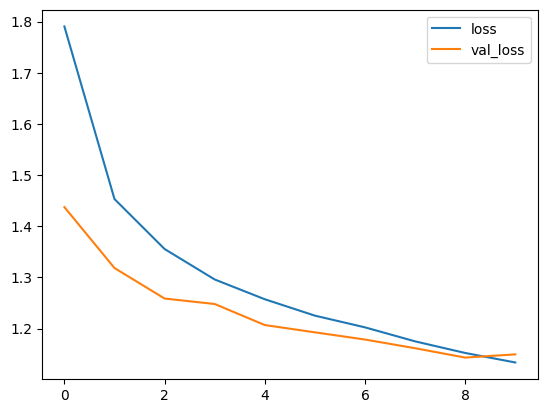

In [ ]:
metrics[['loss','val_loss']].plot()

<Axes: >

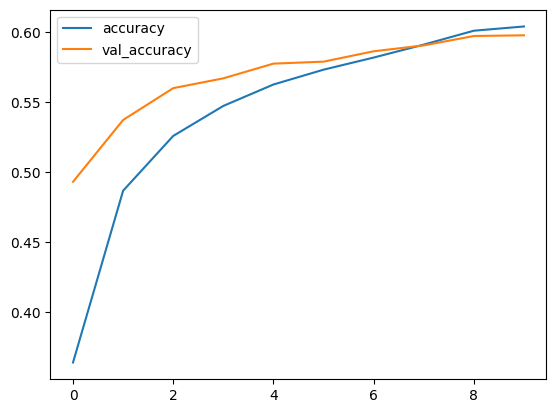

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 3s 9ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[633  33  61  18  21  12  22  25 110  65]
 [ 20 660  13  28   8  18  33  24  31 165]
 [ 51  27 434  54 122  82 125  52  22  31]
 [ 15  59  60 371  73 176 115  53  15  63]
 [ 19  16  58  52 538  42  96 123  27  29]
 [ 11  32  50 131  68 517  66  87   6  32]
 [  8  26  42  29  77  43 736  16   8  15]
 [  7  16  38  24  60  63  27 696   7  62]
 [ 75  73  18  23  19   3   9  10 691  79]
 [ 19 132   9  25   4  14  23  35  39 700]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68      1000
           1       0.61      0.66      0.64      1000
           2       0.55      0.43      0.49      1000
           3       0.49      0.37      0.42      1000
           4       0.54      0.54      0.54      1000
           5       0.53      0.52      0.52      1000
           6       0.59      0.74      0.65      1000
           7       0.62      0.70      0.66      1000
           8       0.72      0.69      0.71      1000
           9       0.56      0.70      0.62      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.59     10000
weighted avg       0.60      0.60      0.59     10000

